<a href="https://colab.research.google.com/github/ANUJGAUR/NYC-Taxi-Trip-Time-Prediction---Capstone-Project/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
import datetime as dt

In [2]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load data in df
df = pd.read_csv('/content/drive/MyDrive/datasets/NYC Taxi Data.csv')

In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [7]:
#Checking null values
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
#Checking unique element of each columns
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

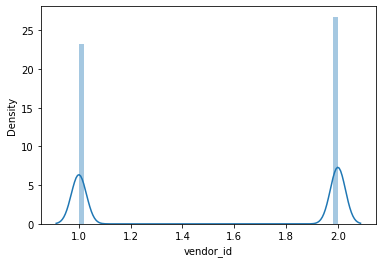

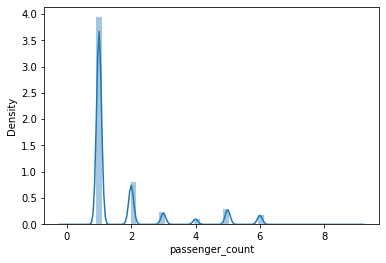

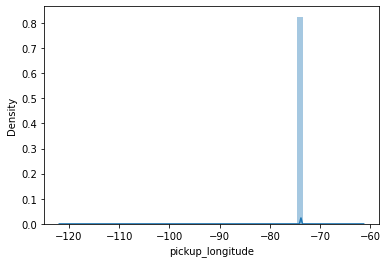

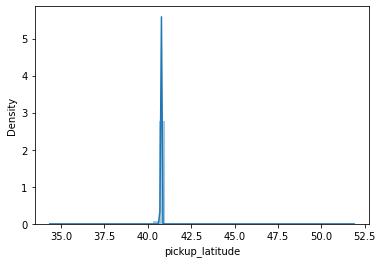

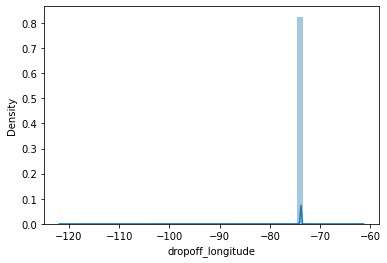

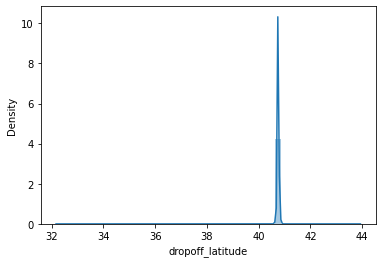

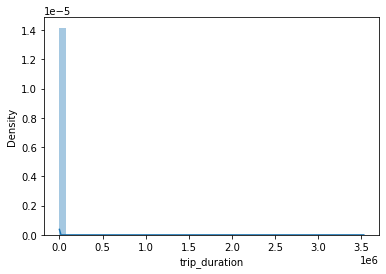

In [9]:
#Distribution plot of each columns
for i in df.describe(): 
  sns.distplot(df[i])
  plt.show()

In [10]:
df.shape

(1458644, 11)

In [11]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [12]:
##changing appropiate dtype of columns
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [13]:
#Extracting day name from datetime
df['pickup_day'] = df['pickup_datetime'].dt.day_name()
df['dropoff_day'] = df['dropoff_datetime'].dt.day_name()

In [14]:
#Extracting weekday from datetime
df['pickup_day_no'] = df['pickup_datetime'].dt.weekday
df['dropoff_day_no'] = df['dropoff_datetime'].dt.weekday

In [15]:
#Extracting hours from datetime
df['pickup_hrs'] = df['pickup_datetime'].dt.hour
df['dropoff_hrs'] = df['dropoff_datetime'].dt.hour

In [16]:
#Extracting month from datetime
df['pickup_month'] = df['pickup_datetime'].dt.month
df['dropoff_month'] = df['dropoff_datetime'].dt.month

In [17]:
#Installing haversine to calulate the distance 
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import haversine as hs

In [19]:
#Function for calculating the distance betwwen pickup and dropoff (latitude,longitude)
def distance(df):
  lat1,lon1,lat2,lon2 = df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude']
  a = hs.haversine((lat1,lon1),(lat2,lon2))
  return a

In [20]:
df['distance'] = df.apply(lambda x : distance(x),axis=1)

In [21]:
#Calculating speed of taxi
df['speed'] = (df['distance']*3600)/df['trip_duration']

In [22]:
# Function for time of day
def time_of_day(x):
  if x in range(6,12):
    return 'Morning'
  elif x in range(12,16):
    return 'Afternoon'
  elif x in range(16,22):
    return 'Evening'
  else:
    return 'Late night'      

In [23]:
df['pickup_time_of_day'] = df['pickup_hrs'].apply(time_of_day)
df['dropoff_time_of_day'] = df['dropoff_hrs'].apply(time_of_day)

In [24]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day_no,dropoff_day_no,pickup_hrs,dropoff_hrs,pickup_month,dropoff_month,distance,speed,pickup_time_of_day,dropoff_time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,0,17,17,3,3,1.498523,11.856445,Evening,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,0,0,6,6,1.805510,9.803672,Late night,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,11,12,1,1,6.385107,10.822216,Morning,Afternoon
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2,2,19,19,4,4,1.485500,12.465738,Evening,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5,5,13,13,3,3,1.188590,9.836608,Afternoon,Afternoon


In [25]:
#Taking numerical columns
numeric_col = df.describe().columns
numeric_col

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'pickup_day_no', 'dropoff_day_no', 'pickup_hrs', 'dropoff_hrs',
       'pickup_month', 'dropoff_month', 'distance', 'speed'],
      dtype='object')

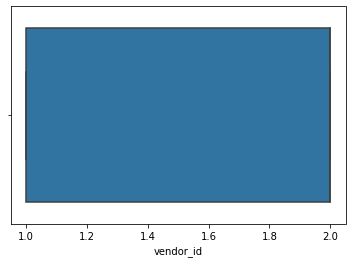

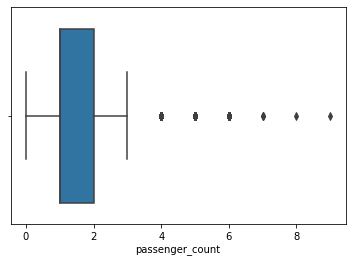

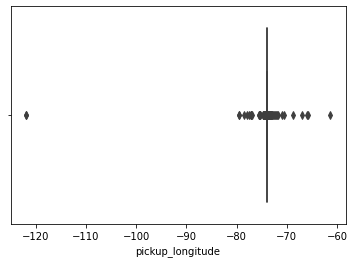

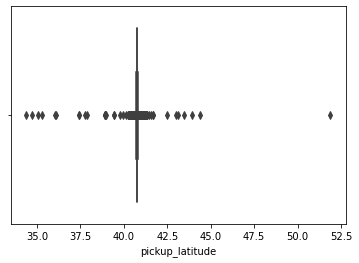

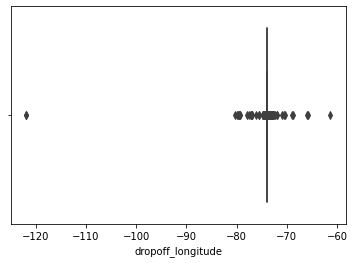

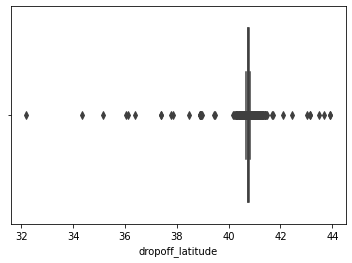

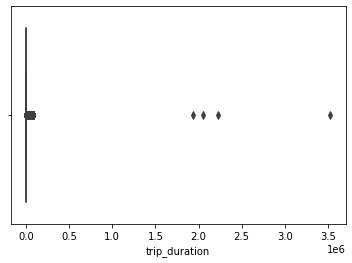

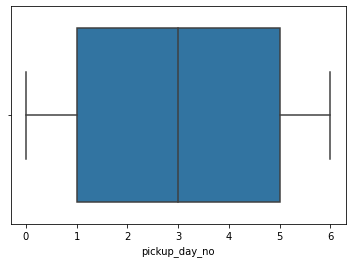

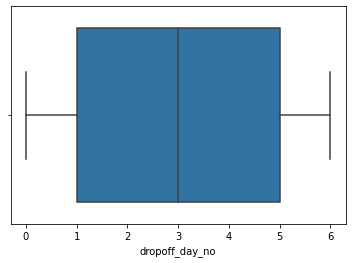

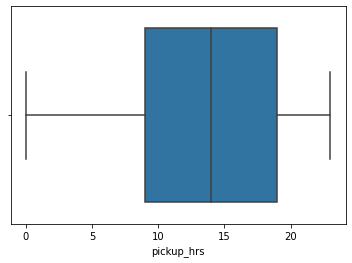

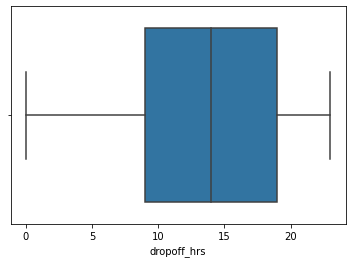

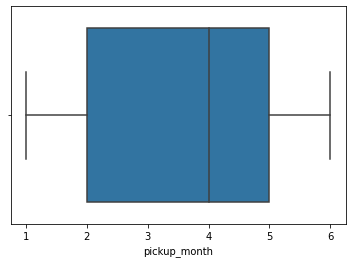

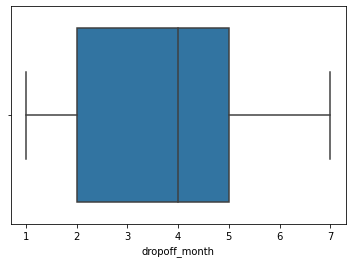

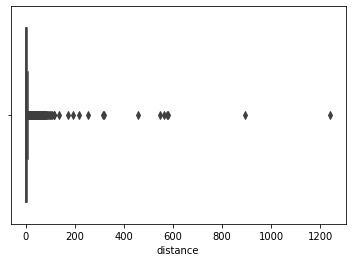

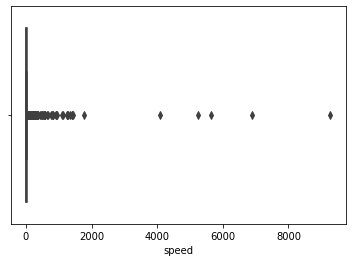

In [26]:
#checking outliers of numeric columns
for i in numeric_col:
  sns.boxplot(df[i])
  plt.show()

In [27]:
#Removing outliers of column trip duration
for i in range(0,100,10):
  a = df['trip_duration'].values
  a=np.sort(a)
  print('{} percentile value is {}'.format(i,int(df['trip_duration'].quantile(i/100))))
print('{} percentile value is {}'.format(100,a[-1]))

0 percentile value is 1
10 percentile value is 245
20 percentile value is 348
30 percentile value is 446
40 percentile value is 548
50 percentile value is 662
60 percentile value is 798
70 percentile value is 968
80 percentile value is 1208
90 percentile value is 1634
100 percentile value is 3526282


In [28]:
for i in range(90,100):
  a = df['trip_duration'].values
  a=np.sort(a)
  print('{} percentile value is {}'.format(i,int(df['trip_duration'].quantile(i/100))))
print('{} percentile value is {}'.format(100,a[-1]))

90 percentile value is 1634
91 percentile value is 1703
92 percentile value is 1780
93 percentile value is 1869
94 percentile value is 1975
95 percentile value is 2104
96 percentile value is 2273
97 percentile value is 2497
98 percentile value is 2829
99 percentile value is 3440
100 percentile value is 3526282


In [29]:
df = df.drop(df[df['trip_duration']>=3440].index)

In [30]:
df.shape

(1444051, 23)

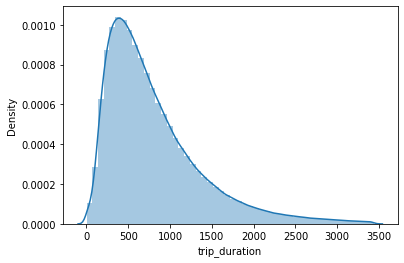

In [31]:
sns.distplot(df['trip_duration'])
plt.show()

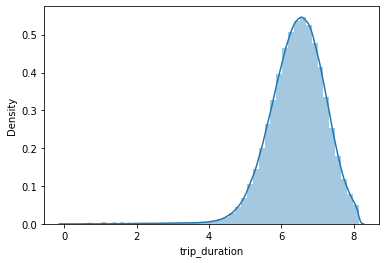

In [32]:
sns.distplot(np.log(df['trip_duration']))
plt.show()

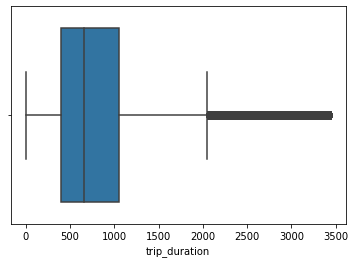

In [33]:
sns.boxplot(df.trip_duration)
plt.show()

In [34]:
#Removing outliers from passenger count
df['passenger_count'].value_counts()

1    1024108
2     207666
5      77220
3      59209
6      47775
4      28009
0         59
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [35]:
df = df.drop(df[df['passenger_count']==0].index)
df = df.drop(df[df['passenger_count']>=7].index)

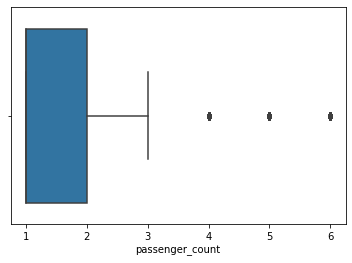

In [36]:
sns.boxplot(df.passenger_count)
plt.show()

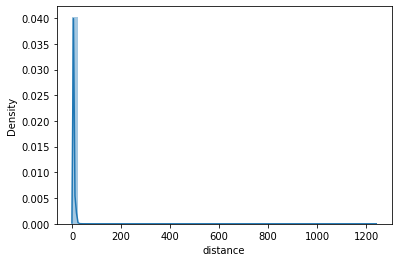

In [37]:
#Removing outliers of distance column
sns.distplot(df['distance'])
plt.show()

In [38]:
df = df.drop(df[df['distance']<0.05].index)

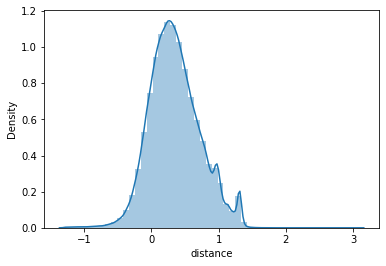

In [39]:
sns.distplot(np.log10(df['distance']))
plt.show()

In [40]:
df = df.drop(df[df['distance']> 100].index)

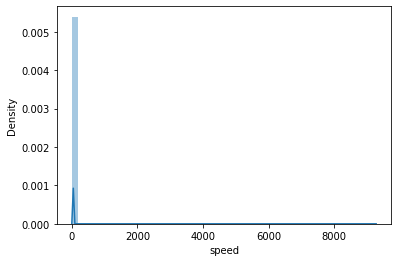

In [41]:
#Removing outliers of spped
sns.distplot(df['speed'])
plt.show()

In [42]:
df = df[df['speed'] <= 50]
df = df[df['speed'] >= 5]

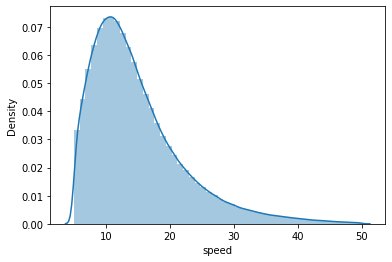

In [43]:
sns.distplot(df['speed'])
plt.show()

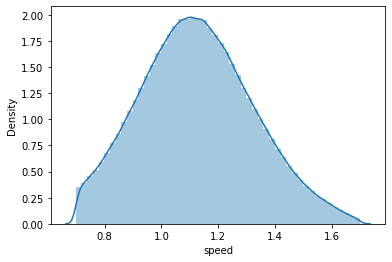

In [44]:
sns.distplot(np.log10(df['speed']))
plt.show()

**Creating dummies**

In [45]:
df1 = pd.get_dummies(df , columns=['store_and_fwd_flag','pickup_time_of_day','dropoff_time_of_day'],prefix=['store','pickup','dropoff'])

# **Correlation Analysis**

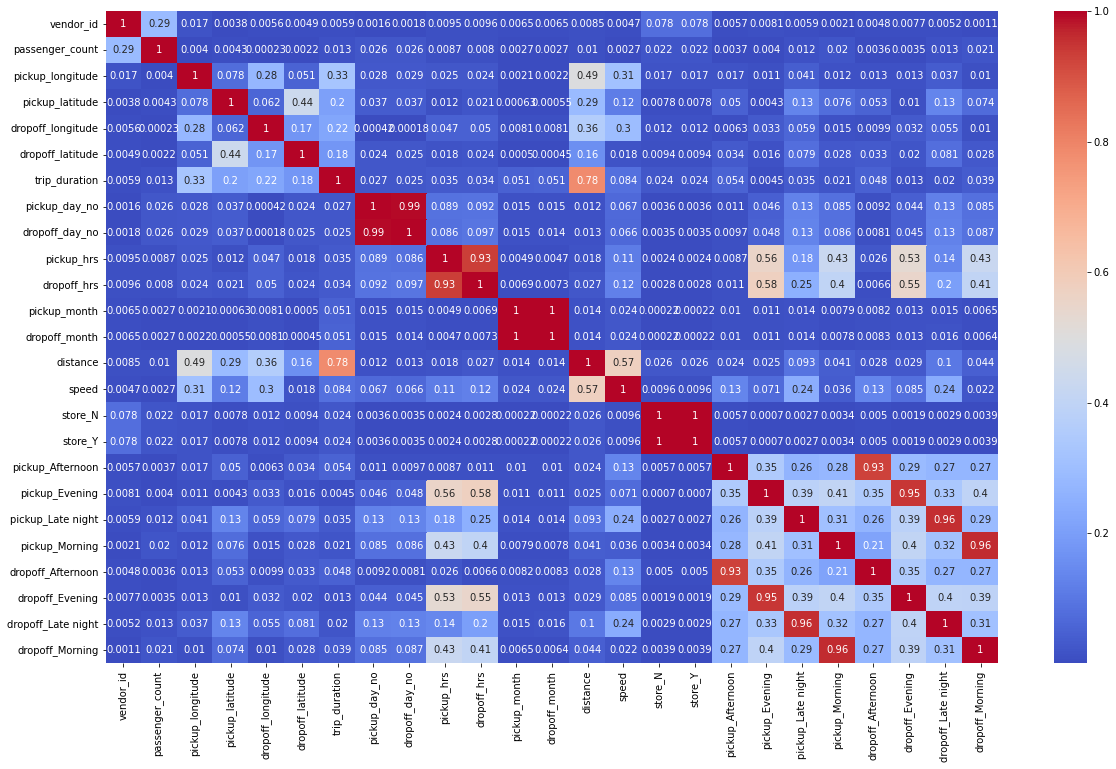

In [46]:
#Let's see correlation graph
plt.figure(figsize=(20,12))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

In [47]:
df_corr = df1.copy()
df_corr.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'pickup_day',
       'dropoff_day', 'pickup_day_no', 'dropoff_day_no', 'pickup_hrs',
       'dropoff_hrs', 'pickup_month', 'dropoff_month', 'distance', 'speed',
       'store_N', 'store_Y', 'pickup_Afternoon', 'pickup_Evening',
       'pickup_Late night', 'pickup_Morning', 'dropoff_Afternoon',
       'dropoff_Evening', 'dropoff_Late night', 'dropoff_Morning'],
      dtype='object')

In [48]:
#Lets drop some feature which are having high correlation (more than 0.4)
df_corr.drop(['dropoff_Afternoon','dropoff_Evening', 'dropoff_Late night', 'dropoff_Morning','store_Y','store_N','dropoff_day_no',
              'pickup_Evening','pickup_Morning','dropoff_month','dropoff_hrs', 'id'],axis=1,inplace=True)

In [49]:
df_corr.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_duration', 'pickup_day', 'dropoff_day',
       'pickup_day_no', 'pickup_hrs', 'pickup_month', 'distance', 'speed',
       'pickup_Afternoon', 'pickup_Late night'],
      dtype='object')

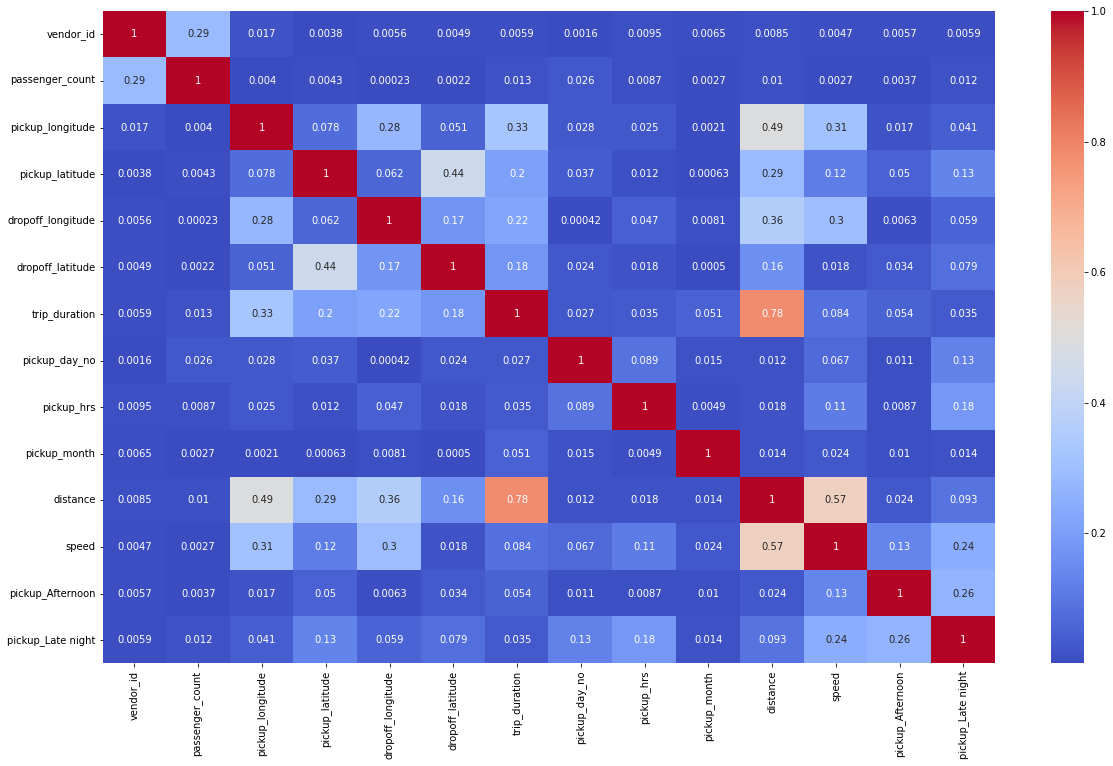

In [50]:
#Lets check correlation graph again after removing high correlation
plt.figure(figsize=(20,12))
correlation = df_corr.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

In [51]:
#Spliting dependent and independent variables
independent_variables=['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','distance', 'pickup_hrs']

dependent_variables = 'trip_duration'

In [52]:
X = df_corr[independent_variables]

y = df_corr[dependent_variables]

In [53]:
print(X.shape)
print(y.shape)

(1371897, 6)
(1371897,)


In [54]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [55]:
# Transforming data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [56]:
X[0:2]

array([[-0.21928799,  0.60453179,  0.26591749,  0.42367291, -0.52300515,
         0.52234612],
       [-0.17106823, -0.47019931, -0.75584527, -0.65915199, -0.4390896 ,
        -2.10592726]])

In [57]:
#Importing train test split
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

In [58]:
print('Train Data Shape')
print(X_train.shape)
print(y_train.shape)
print('\n')
print('Test Data Shape')
print(X_test.shape)
print(y_test.shape)

Train Data Shape
(891733, 6)
(891733,)


Test Data Shape
(480164, 6)
(480164,)
